In [1]:
import pandas as pd
import matplotlib
matplotlib.rc('font',size=8)
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

In [2]:
# Get Vaccine data from Johns Hopkins Centers For Civic Impact github (raw csv data location)

vaccine_data_location = "https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/raw_data/vaccine_data_us_state_timeline.csv"
    
vf = pd.read_csv(vaccine_data_location,parse_dates=[0])
vf = vf.pivot_table(columns=['Province_State'],index='date')
cols, states = vf.columns.levels

today = pd.datetime.today().strftime('%Y-%m-%d')
latest_data = vf.index.max().strftime('%Y-%m-%d')
print("Dashboard updated:\t{} \nLatest Data:\t\t{}".format(today,latest_data))

Dashboard updated:	2021-02-03 
Latest Data:		2021-02-03


In [3]:
# pandas import of state pops already exists in my support doc, hidden to protect local file paths
from covid_support import state_info
# Select AZ, CA, ME, NY, OR, TX, WA, WI
state_info = state_info.iloc[[0,1,7,8,9,12,14,15,16]]
state_info['c'] = ['hotpink','b','gold','g','r','c','m','y','k']
shortlist_states = state_info.loc[[1,9,12,14,15]]  # CA NY OR TX WA

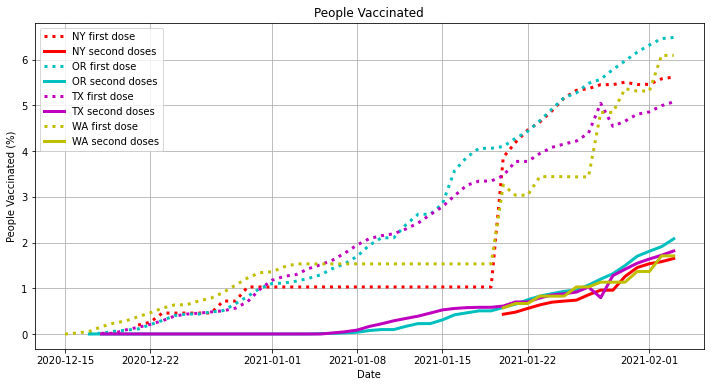

In [4]:
# Total Vaccines vs. Time
# TODO maybe use interpolatin instead of ffill na, but maybe that it is bad to infer any data
plt.figure(figsize=(12,6))
for i,r in shortlist_states.iterrows():
    try:
        vac_per_pop = (vf['people_total',r['State']]/(r['Pop']/1e2)).fillna(method='ffill')
        second_vac_per_pop = (vf['people_total_2nd_dose',r['State']]/(r['Pop']/1e2)).fillna(method='ffill')
        plt.plot(vf.index, vac_per_pop,linewidth=3, label=r['Short']+' first dose',linestyle='dotted',color=r['c'])
        plt.plot(vf.index, second_vac_per_pop,linewidth=3, label=r['Short']+' second doses',linestyle='solid',color=r['c'])
    except KeyError:
        continue    # total people doesnt exist for CA
plt.title('People Vaccinated')
plt.ylabel('People Vaccinated (%)')
plt.xlabel('Date')
plt.legend()
plt.grid(which='both')

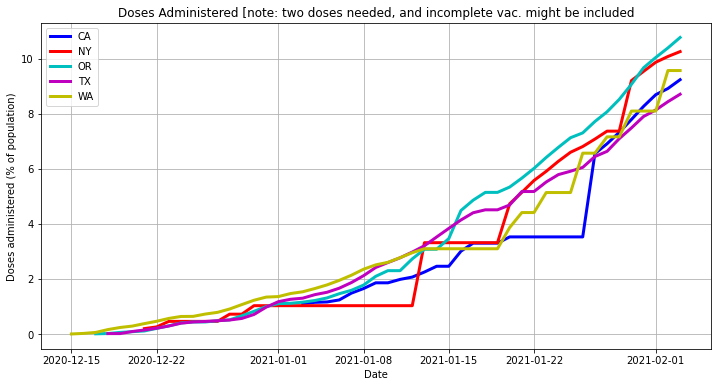

In [5]:
plt.figure(figsize=(12,6))
for i,r in shortlist_states.iterrows():
    try:
        dose_per_pop = (vf['doses_admin_total',r['State']]/(r['Pop']/1e2)).fillna(method='ffill')
        plt.plot(vf.index, dose_per_pop,linewidth=3, label=r['Short'],linestyle='solid',color=r['c'])
    except KeyError:
        print(r['State']+" not plotted")
        continue    # total people doesnt exist for CA
plt.title('Doses Administered [note: two doses needed, and incomplete vac. might be included')
plt.ylabel('Doses administered (% of population)')
plt.xlabel('Date')
plt.legend()
plt.grid(which='both')

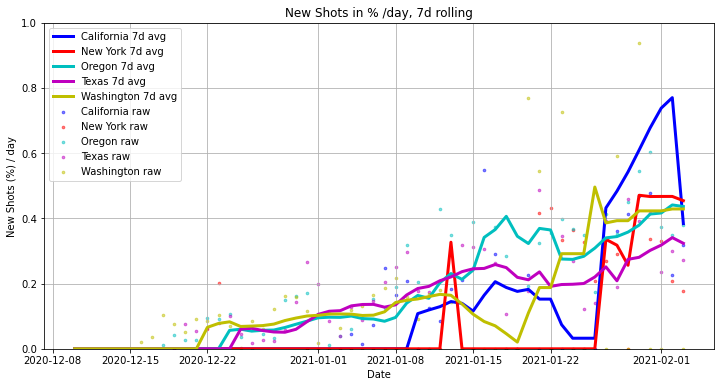

In [6]:
# New Shots per day normalized
plt.figure(figsize=(12,6))
for i,r in shortlist_states.iterrows():
    new_shots_per_pop = (vf['doses_admin_total',r['State']]/(r['Pop']/1e2)).diff().rolling(7).mean().fillna(0)
    plt.scatter(vf.index, (vf['doses_admin_total',r['State']]/(r['Pop']/1e2)).diff(),color=r['c'],s=7,alpha=0.5,label=r['State']+' raw')
    plt.plot(vf.index, new_shots_per_pop,linewidth=3, label=r['State']+' 7d avg',color=r['c'])
plt.title('New Shots in % /day, 7d rolling')
plt.ylabel('New Shots (%) / day')
plt.xlabel('Date')
plt.ylim(0,1)
plt.legend()
plt.grid(which='both')